# How To handle Outliers Using IQR-Statistics ?


 To know in my data is having outliers or not. we can visualize each and every Continuous columns by using box plot. 
*Remember this is not only step to find outliers.

 To handle outliers in data we need to know 5 Number Summary which is given by box plot.
* Minimum 
* 25%
* median
* 75%
* Maximum
 
 
 If i have data like this,
[1,2,3,4,5,6,7,8,9]


(1)How to calculate the median ?
* To calculate the median we need to reorder this into Ascending & Descending Order.As you can see here its already in Ascending order.and i need to pick the middle value.


(2)How to calculate the 25% ?
* Formula to calculate this is = 25%*(n+1).
 
 
(3)How to calculate the 75% ?
* Formula to calculate this is = 75%*(n+1).
 
 
(4)How to calculate the minimum value ?
* values which is minimum in my data.Here minimum is 1.
 
 
(5)How to calculate the maximum ?
* value which is maximum in my data.here maximum is 9.



# How to calculate IQR ? 
* IQR stands for Inter Quartile Range. Formula for IQR is= 75% -25% (or) Q3-Q1.
# How to calculate Inner bracket and outer bracket ?
* After calculating IQR, we need to know which range of values i am not going to treat as a outlier.so i need to calculate this two thing which is inner bracket and outer bracket.
* Inner bracket= 25% -(1.5)IQR
* Outer bracket= 75% +(1.5)IQR
 

# Coding implementation


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Jyotiranjan padhi\Desktop\data folder\updated_Lending_Data.csv")
df.head()

,Unnamed: 0,Name of Lending Institution,HQ State,Rank,TA Ratio1,TBL Ratio1,"Amount ($1,000)",Number,Lender Asset Size,"Amount ($1,000).1",Number .1,"Amount ($1,000).2",Number .2,CC Amount/TA1
0,1,American Express Co.,NY,1,238.0,1000.0,16350038.0,3603226.0,2,16318089.0,3603088.0,31949.0,138.0,0.28000
1,2,First Citizens Banchares,NC,2,187.0,491.0,3914507.0,117702.0,1,378394.0,105081.0,3536113.0,12621.0,0.02087
2,3,Wintrust Financial Corp.,IL,3,169.0,384.0,2842793.0,136801.0,1,800526.0,126455.0,2042267.0,10346.0,0.00000
3,4,Zions Bancorp,UT,4,118.0,261.0,6231770.0,52612.0,2,526206.0,32973.0,5705564.0,19639.0,0.00000
4,5,Synovus Financial Corp.,GA,5,162.0,381.0,4227168.0,22675.0,1,539666.0,9593.0,3687502.0,13082.0,0.01000


In [3]:
df1 = pd.pivot_table(df, index=["Rank"],values=['Number '])
print(df1.shape)

(81, 1)


In [4]:
df1.columns

Index(['Number '], dtype='object')

In [5]:
df1.describe()

,Number
count,8.100000e+01
mean,1.998339e+05
std,6.415533e+05
min,2.000000e+00
25%,3.134000e+03
50%,1.379900e+04
75%,5.754300e+04
max,3.603226e+06


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number '>

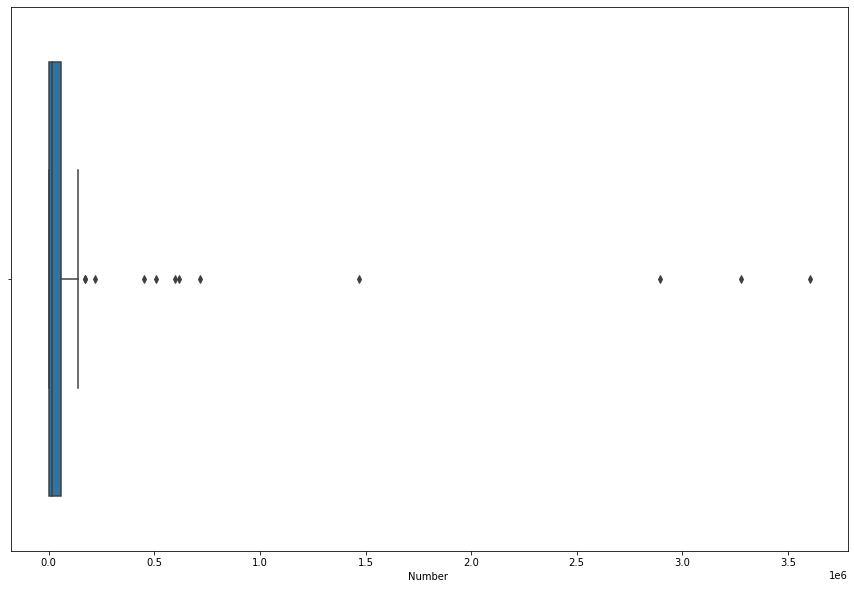

In [6]:
plt.figure(figsize=(15,10))
sns.boxplot(df1['Number '])

In [7]:
#Here you can see there are so many outliers which is represented with dimond shape
q1=df1['Number '].quantile(0.25)
q3=df1['Number '].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)

3134.0 57543.0 54409.0


In [8]:
lower_bracket=q1 -1.5 * iqr
upper_bracket=q3 +1.5 * iqr
print(lower_bracket,upper_bracket)

-78479.5 139156.5


In [9]:
df1[(df1['Number ']<lower_bracket)|(df1['Number ']>upper_bracket)]

,Number
Rank,
0,1.731354e+05
1,3.603226e+06
6,5.068790e+05
8,1.467326e+06
11,4.517305e+05
17,7.162310e+05
18,2.893892e+06
19,5.961083e+05
23,3.277274e+06


In [10]:
no_outlier = df1[(df1['Number ']>lower_bracket)&(df1['Number ']<upper_bracket)]
no_outlier

,Number
Rank,
2,117702.0
3,136801.0
4,52612.0
5,22675.0
7,25011.0
...,...
84,405.0
85,406.0
86,351.0


# Steps we followed here
1. Importing data
2. Creating pivot table which contains "Number"
3. Box plot to find outliers.
4. Describe "Number" by using pandas function ".describe()"
5. Find the q1,q2 which is 25% and 75%.
6. Find IQR.
7. Calculating lower bracket and upper bracket.
8. Filtering data to know which are the outliers.
9. Remove the outliers and store in a veriable.